<a href="https://colab.research.google.com/github/christyesmee/cnn-sign-language/blob/main/final_model%2B_enhanced_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting data sets

In [ ]:
# Upload configuration file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# lib for load data from kaggle
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.01G/1.03G [00:09<00:00, 151MB/s]
100% 1.03G/1.03G [00:10<00:00, 109MB/s]


In [ ]:
!kaggle datasets download -d ruslanbredun/sign-language-eng-alphabet

 99% 1.43G/1.45G [00:12<00:00, 121MB/s]
100% 1.45G/1.45G [00:12<00:00, 122MB/s]


#Extracting data sets

In [ ]:
# Extract the ds 1
zip_ref = zipfile.ZipFile('asl-alphabet.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# Extract the ds 2
zip_ref = zipfile.ZipFile('sign-language-eng-alphabet.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# Extract the number of instances in each class
#len(os.listdir('/content/asl_alphabet_test/asl_alphabet_test'))
print('The number of instances in each class of the DS1: ',len(os.listdir('/content/asl_alphabet_train/asl_alphabet_train/A')))


The number of instances in each class of the DS1:  3000


In [ ]:
# Extract the number of instances in each class
#len(os.listdir('/content/asl_alphabet_test/asl_alphabet_test'))
print('The number of instances in each class of the DS2: ',len(os.listdir('/content/Images/A')))

The number of instances in each class of the DS2:  1000


In [ ]:
# Load Data
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Filter
from PIL import Image
import glob
import os
import requests

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
# Save the link of dataset
dir_1 = '/content/asl_alphabet_train/asl_alphabet_train'
dir_2 = '/content/Images'

#Preprocessing of data sets

In [ ]:
def labelToVector(dir) :
  classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z']

  images = []
  labels = []
  for i in range(26):
    print("Obtaining images of", classes[i], "....")
    for image in os.listdir(dir + "/" + classes[i]) :
      img = cv2.imread(dir + "/" + classes[i] + "/" + image)
      img = cv2.resize(img, (32,32))
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img2 = cv2.GaussianBlur(gray,(3,3),0)
      img3 = (2*gray)-img2
      #lap = cv2.Laplacian(gray, ddepth=cv2.CV_64F)
      kernel = np.ones((5,5),np.uint8)
      opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
      images.append(opening)
      labels.append(i)
  return images, labels


print("Extracting dataset 1....")
X1, y1 = labelToVector(dir_1)

Extracting dataset 1....
Obtaining images of A ....
Obtaining images of B ....
Obtaining images of C ....
Obtaining images of D ....
Obtaining images of E ....
Obtaining images of F ....
Obtaining images of G ....
Obtaining images of H ....
Obtaining images of I ....
Obtaining images of J ....
Obtaining images of K ....
Obtaining images of L ....
Obtaining images of M ....
Obtaining images of N ....
Obtaining images of O ....
Obtaining images of P ....
Obtaining images of Q ....
Obtaining images of R ....
Obtaining images of S ....
Obtaining images of T ....
Obtaining images of U ....
Obtaining images of V ....
Obtaining images of W ....
Obtaining images of X ....
Obtaining images of Y ....
Obtaining images of Z ....


In [ ]:
def labelToVector2(dir):
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
               'W', 'X', 'Y']

    images = []
    labels = []
    for i, class_name in enumerate(classes):
        print("Obtaining images of", class_name, "....")
        for image in os.listdir(dir + "/" + class_name):
            img = cv2.imread(dir + "/" + class_name + "/" + image)
            img = cv2.resize(img, (32, 32))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img2 = cv2.GaussianBlur(gray, (3, 3), 0)
            img3 = (2 * gray) - img2
            kernel = np.ones((5, 5), np.uint8)
            opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
            images.append(opening)
            labels.append(i)
    return images, labels

print("Extracting dataset 2....")
#removed classes, J and Z missing...
#how to name the X1 and y1?? cuz for dir_1 it is already named X1, y2.
#how not to overwrite it?

#original:
#X1, y1 = labelToVector2(dir_2)

#try:
x_test, y_test = labelToVector2(dir_2)

Extracting dataset 2....
Obtaining images of A ....
Obtaining images of B ....
Obtaining images of C ....
Obtaining images of D ....
Obtaining images of E ....
Obtaining images of F ....
Obtaining images of G ....
Obtaining images of H ....
Obtaining images of I ....
Obtaining images of K ....
Obtaining images of L ....
Obtaining images of M ....
Obtaining images of N ....
Obtaining images of O ....
Obtaining images of P ....
Obtaining images of Q ....
Obtaining images of R ....
Obtaining images of S ....
Obtaining images of T ....
Obtaining images of U ....
Obtaining images of V ....
Obtaining images of W ....
Obtaining images of X ....
Obtaining images of Y ....


In [ ]:
# The total number of instances in the training set

#### How can this be the "training" set if the data set is not split yet? ####

#print("The total number of instances in the training set:", len(X1))


#try:
print("The total number of instances in the training set:", len(X1))
print("The total number of instances in the training set:", len(x_test))


The total number of instances in the training set: 78000
The total number of instances in the training set: 24000


In [ ]:
print(type(x_test), type(X1))

<class 'list'> <class 'list'>


In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z']

<Figure size 432x288 with 0 Axes>

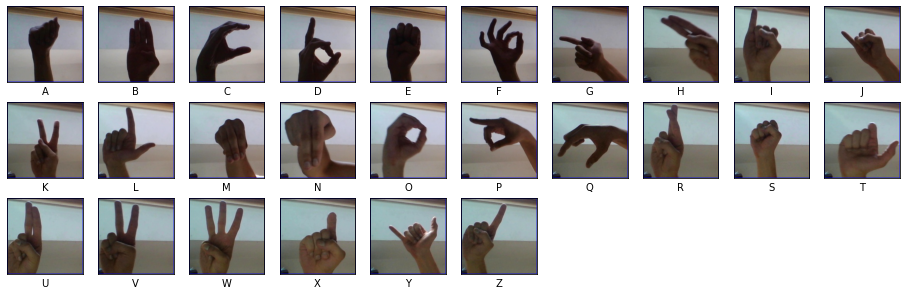

In [ ]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,26):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = dir_1 + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])

plot_sample_images()

In [ ]:
def encodingVector(labels):
  onehot_encoded = list()
  for value in labels:
    letter = [0.0 for _ in range(26)]
    letter[int(value)] = 1.0
    onehot_encoded.append(letter)
  return np.array(onehot_encoded)

In [ ]:
### original

# def preprocess_data(X,y):
#   np_X = np.array(X)
#   normalised_X = np_X.astype('float32')/255.0

#   label_encoded_y = encodingVector(y)

#   x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)

#   return x_train, x_test, y_train, y_test


# x_train, x_test, y_train, y_test = preprocess_data(X1,y1)



In [ ]:
print(type(x_test), type(X1))

<class 'list'> <class 'list'>


In [ ]:
def preprocess_data(x_train, y_train, val_size=0.1):
    np_X = np.array(x_train)
    normalised_X = np_X.astype('float32') / 255.0

    label_encoded_y = encodingVector(y_train)

    # Split into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(normalised_X, label_encoded_y, test_size=val_size)

    return x_train, x_val, y_train, y_val

x_train, x_val, y_train, y_val = preprocess_data(X1, y1)


In [ ]:
print(type(x_test), type(X1))

<class 'list'> <class 'list'>


In [ ]:
def preprocess_data(x_test, y_test):
    np_X = np.array(x_test)
    normalised_X = np_X.astype('float32') / 255.0

    label_encoded_y = encodingVector(y_test)

    return normalised_X, y_test



In [ ]:
print(type(x_test), type(X1))

<class 'list'> <class 'list'>


In [ ]:
x_test = np.array(x_test)

In [ ]:
y_test[0]

0

In [ ]:
# Preprocess the training data
# x_train_preprocessed, y_train_encoded = preprocess_data(x_train, y_train)

# Preprocess the test data
x_test_preprocessed, y_test_encoded = preprocess_data(x_test, y_test)


In [ ]:
print(type(x_train), type(x_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print("Training size:", x_train.shape)
print("Validation size:", x_val.shape)

#is a list, should be numpy array
#why is it not an array?
#where is the training set converted to array?
print("Testing size:", x_test.shape)

Training size: (70200, 32, 32)
Validation size: (7800, 32, 32)
Testing size: (24000, 32, 32)


In [ ]:
print("The class of the first element in training set:",y1[701])
print("The vector of the first element in training set:",y_train[703]) #the order after the split is changed

The class of the first element in training set: 0
The vector of the first element in training set: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


##Dataset 1: apply filter

In [ ]:
img = cv2.imread("/content/asl_alphabet_train/asl_alphabet_train/A/A1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.GaussianBlur(gray,(3,3),0)
img3 = (2*gray)-img2

(-0.5, 199.5, 199.5, -0.5)

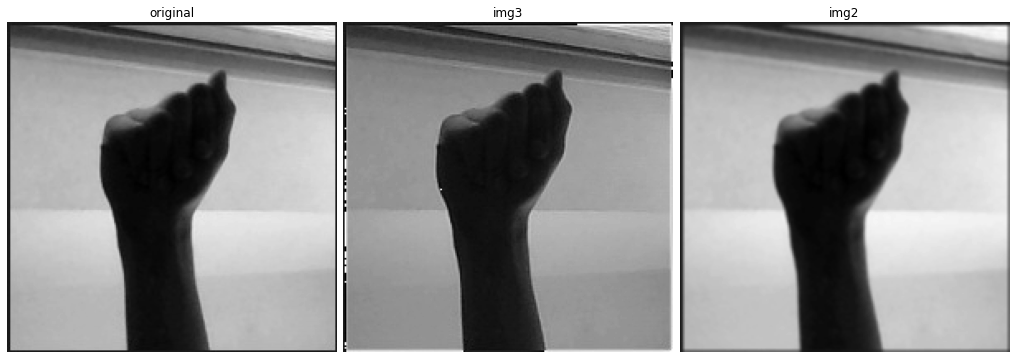

In [ ]:
plt.figure(figsize=(14,16), constrained_layout=True)
plt.subplot(231)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.axis("off")

plt.subplot(232)
plt.imshow(img3, cmap='gray')
plt.title('img3')
plt.axis("off")

plt.subplot(233)
plt.imshow(img2, cmap='gray')
plt.title('img2')
plt.axis("off")

#Dataset 2: apply filter

In [ ]:
folder='/content/Images' # All images are in this folder, specify the path
imList=glob.glob(folder+'/*/*') # Reading all files, if you want to specify for .jpg or .png (for example if there are other files inside this folder)
                                  #then you need to do: imList=glob.glob(folder+'/*/*.jpg')
newfold = '/content/Images/preprocessed_images' # New folder path


for img1 in imList: # Loop through all the images in our data set
    im = Image.open(img1) # Opening image
    fileName, fileExt = os.path.splitext(img1) # Extract the filename and
                                               #  Extension from path

  #  im.save(newfold+fileName+'.jpg')  #save the image to new folder from
                                        #old folder



In [ ]:
img = Image.open(imList[0])

In [ ]:
img = cv2.imread(imList[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.GaussianBlur(gray,(3,3),0)
img3 = (2*gray)-img2

(-0.5, 223.5, 223.5, -0.5)

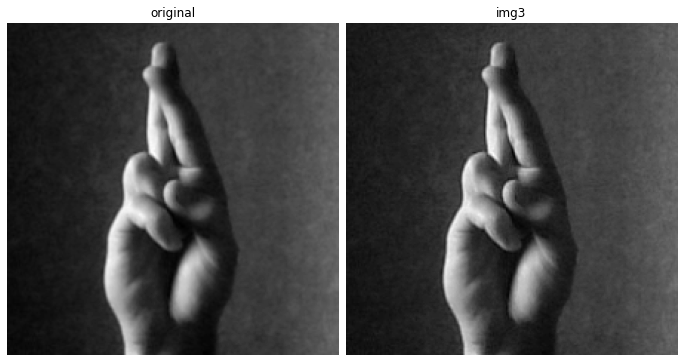

In [ ]:
plt.figure(figsize=(14,16), constrained_layout=True)
plt.subplot(231)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.axis("off")

plt.subplot(232)
plt.imshow(img3, cmap='gray')
plt.title('img3')
plt.axis("off")



#Model

In [ ]:
classes = 26
batch = 32
epochs = 10
learning_rate = 0.001

In [ ]:
model = Sequential()
# Basic structure contains 1 Convolution layer with ReLU activation function, 1 Max Pooling, 1 optional Batch Normalization, and Flattern layer
# The input shape should be 32, 32, 1. This is because the data is grayscale and only has one channel.
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
# ANN contains 3 hidden layer with 1 Dropout, 1 ReLU, and 1 Softmax for classification
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

#to add layer of dimension
#data = np.expand_dims(model, axis=0)

In [ ]:
adam = Adam(learning_rate=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [ ]:
#original with splitting into validation.
#history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

In [ ]:
history = model.fit(
    x_train,  # The preprocessed training data
    y_train,  # The one-hot encoded training labels
    batch_size=batch,  # The number of samples per gradient update
    epochs=epochs,  # The number of times the model will iterate over the entire dataset
    validation_data=(x_val, y_val),  # The preprocessed validation data and one-hot encoded validation labels
    shuffle=True,  # Whether to shuffle the training data before each epoch
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10
2194/2194 [==============================] - 28s 7ms/step - loss: 0.8075 - accuracy: 0.7490 - val_loss: 0.5181 - val_accuracy: 0.8278
Epoch 2/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.2733 - accuracy: 0.9110 - val_loss: 0.2609 - val_accuracy: 0.9155
Epoch 3/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.1856 - accuracy: 0.9421 - val_loss: 0.6066 - val_accuracy: 0.8510
Epoch 4/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.1489 - accuracy: 0.9532 - val_loss: 0.2881 - val_accuracy: 0.9191
Epoch 5/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.1289 - accuracy: 0.9621 - val_loss: 0.4243 - val_accuracy: 0.8894
Epoch 6/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.2609 - val_accuracy: 0.9240
Epoch 7/10
2194/2194 [==============================] - 15s 7ms/step - loss: 0.0977 - accuracy: 0.9719 - val_loss: 0.2068 - val_ac

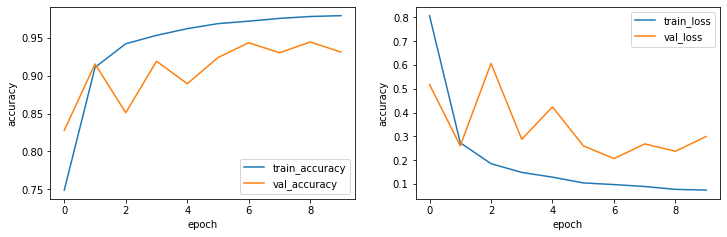

In [ ]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()



plot_results(model)

#Evaluating the model

In [ ]:
 # test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test))
test_loss, test_acc = model.evaluate(x_test_preprocessed, y_test_encoded)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

750/750 [==============================] - 3s 4ms/step - loss: 39.9854 - accuracy: 0.0285
Test accuracy: 0.028541667386889458
Test loss: 39.985355377197266


In [ ]:
y_test[0].shape

AttributeError: ignored

In [ ]:
y_train[0].shape

(26,)

In [ ]:
\
